# LA LIGA DATA ANALYSIS

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [3]:
with sqlite3.connect("../laliga.sqlite") as con:
    df = pd.read_sql("""SELECT * FROM Matches""", con = con)
	


In [4]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [22]:
num_valores_none = df["score"].isna().sum()

In [23]:
num_valores_none

780

teniendo en cuenta que los valores none de SCORE es un 1.6% y son partidos que no se han jugado, no los tomamos en cuenta para realizar el gráfico

In [26]:
df.dtypes

season       object
division      int64
matchday      int64
date         object
time         object
home_team    object
away_team    object
score        object
dtype: object

In [5]:
df[['score1', 'score2']] = df['score'].str.split(':', expand=True)

In [29]:
df.dtypes

season       object
division      int64
matchday      int64
date         object
time         object
home_team    object
away_team    object
score        object
score1       object
score2       object
dtype: object

In [6]:
df

,season,division,matchday,date,time,home_team,away_team,score,score1,score2
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2
...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,None,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,None,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,None,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,None,None


In [42]:
df['score1'] = pd.to_numeric(df['score1']).fillna(0).astype(int)
df['score2'] = pd.to_numeric(df['score2']).fillna(0).astype(int)

In [43]:
df.dtypes

season       object
division      int64
matchday      int64
date         object
time         object
home_team    object
away_team    object
score        object
score1        int32
score2        int32
Resultado    object
dtype: object

In [44]:
df['Resultado'] = 0
df.loc[df['score1'] > df['score2'], 'Resultado'] = 1
df.loc[df['score1'] < df['score2'], 'Resultado'] = 2
df.loc[df['score1'] == df['score2'], 'Resultado'] = 3

In [45]:
df

,season,division,matchday,date,time,home_team,away_team,score,score1,score2,Resultado
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,2
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,1
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,1
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,3
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,0,0,3
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,0,0,3
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,0,0,3
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,0,0,3


In [46]:
df['Resultado'] = df['Resultado'].replace({1: 'Home', 2: 'Visitor', 3: 'Tie'})

In [47]:
df_filter = df[df['Resultado'].notnull()]

In [48]:
df_filter

,season,division,matchday,date,time,home_team,away_team,score,score1,score2,Resultado
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,Visitor
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,Home
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,Home
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,Tie
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,Visitor
...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,0,0,Tie
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,0,0,Tie
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,0,0,Tie
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,0,0,Tie


In [49]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

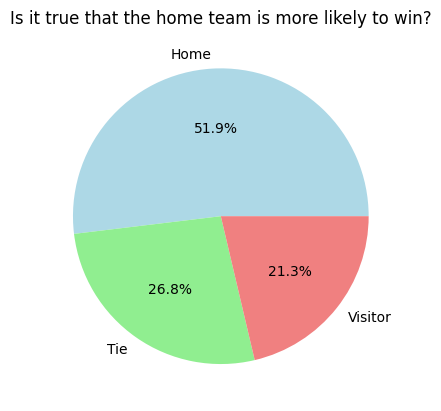

In [50]:
grafico = df_filter['Resultado'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
grafico.set_ylabel('')
grafico.set_title('Is it true that the home team is more likely to win?')
plt.show()

## EJERCICIO2

In [85]:
home_goals = df.loc[df['division'] == 1].groupby('home_team')['score1'].sum()
away_goals = df.loc[df['division'] == 1].groupby('away_team')['score2'].sum()
total_goals = home_goals.add(away_goals, fill_value=0)
TOP_total_goals = total_goals.sort_values(ascending=False).head(10)

In [87]:
home_goals_conceded = df.loc[df['division'] == 1].groupby('home_team')['score2'].sum()
away_goals_conceded = df.loc[df['division'] == 1].groupby('away_team')['score1'].sum()
total_goals_conceded = home_goals_conceded.add(away_goals_conceded, fill_value=0)
TOP_total_goals_conceded = total_goals_conceded.sort_values(ascending=False).head(10)

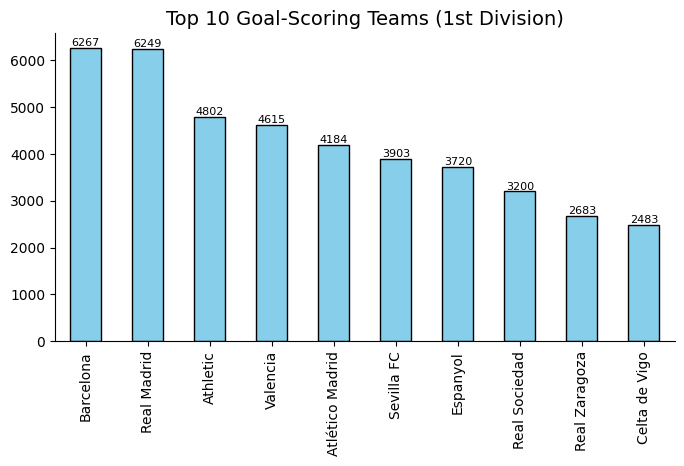

In [101]:
figure_1, axes_1 = plt.subplots(figsize=(8, 4))
TOP_total_goals.plot(kind='bar', ax=axes_1, color='skyblue', edgecolor='black')

plt.title('Top 10 Goal-Scoring Teams (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals):
    axes_1.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_1.spines['top'].set_visible(False)
axes_1.spines['right'].set_visible(False)

plt.show()


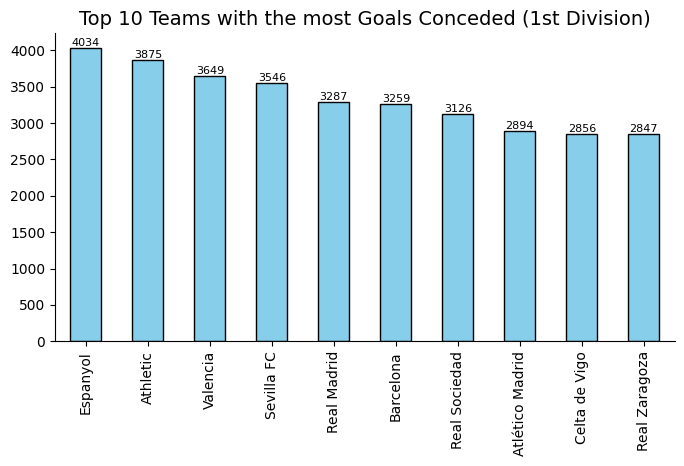

In [102]:
figure_2, axes_2 = plt.subplots(figsize=(8, 4))
TOP_total_goals_conceded.plot(kind='bar', ax=axes_2, color='skyblue', edgecolor='black')

plt.title('Top 10 Teams with the most Goals Conceded (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals_conceded):
    axes_2.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_2.spines['top'].set_visible(False)
axes_2.spines['right'].set_visible(False)

plt.show()

In [84]:
df.loc[df['division']==1,'goal_difference'] = abs(df['score1'] - df['score2']).fillna(0).astype(int)
highest_goal_dif = df.sort_values('goal_difference', ascending = False).head(10)
highest_goal_dif

,season,division,matchday,date,time,home_team,away_team,score,score1,score2,Resultado,goal_difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,12,1,Home,11
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,10,0,Home,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,10,0,Home,10
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,11,1,Home,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,10,0,Home,10
3121,1951-1952,1,22,2/10/52,None,Barcelona,Real Gijón,9:0,9,0,Home,9
2608,1949-1950,1,13,12/4/49,None,Sevilla FC,Gimnàstic,9:0,9,0,Home,9
4428,1957-1958,1,6,10/20/57,None,Atlético Madrid,UD Las Palmas,9:0,9,0,Home,9
4745,1958-1959,1,15,12/28/58,None,Athletic,Real Gijón,9:0,9,0,Home,9
2771,1950-1951,1,9,11/5/50,None,Dep. La Coruña,Lérida,10:1,10,1,Home,9
